# Projeto Módulo 4: Cálculo de Métricas de Avaliação de Aprendizado

## Neste projeto, vamos calcular as principais métricas para avaliação de modelos de classificação de dados, como acurácia, sensibilidade (recall), especificidade, precisão e F-score. Para que seja possível implementar estas funções, você deve utilizar os métodos e suas fórmulas correspondentes (Tabela 1).

## Para a leitura dos valores de VP, VN, FP e FN, será necessário escolher uma matriz de confusão para a base dos cálculos. Essa matriz você pode escolher de forma arbitraria, pois nosso objetivo é entender como funciona cada métrica.

<img src="..\img\tab1.png" align='center' alt="drawing" width="603" heigth="221"/>

Para esse projeto de exemplo, vou utilizar um modelo de classificação para prever se uma amostra de tecido é benigna(classe 1) ou maligna(classe 0). 
O conjunto de dados Breast Cancer Wisconsin é uma base de dados amplamente utilizada para problemas de classificação relacionados ao diagnóstico de câncer de mama. 

O conjunto de dados consiste em 569 amostras de tecido mamário, com 30 características diferentes para cada amostra. Além das características, o conjunto também fornece as classes reais associadas a cada amostra, indicando se é benigna ou maligna.

## Carregando as bibliotecas:

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Carregando o Dataset:

In [282]:
# Carregar o dataset
data = load_breast_cancer()

In [283]:
list(data.target_names)

['malignant', 'benign']

In [387]:
# Criar o DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Adicionar a coluna alvo (classe) ao DataFrame
df['target'] = data.target #classes

# Exibir as primeiras linhas do DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Plotando um gráfico para visualizar a distribuição das classes**.

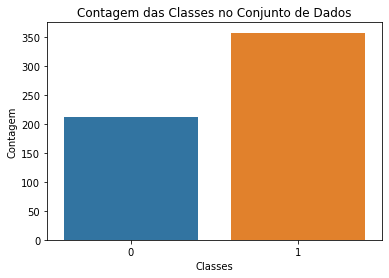

In [388]:
# Plotar o gráfico de barras com Seaborn
sns.countplot(x='target', data=df )

# Configurar os rótulos do eixo x e y
plt.xlabel('Classes')
plt.ylabel('Contagem')

# Definir o título do gráfico
plt.title('Contagem das Classes no Conjunto de Dados')

# Exibir o gráfico
plt.show()


## Dividindo o conjunto para Treino e Teste

In [389]:
# Separando a target

X = df.drop('target',axis=1)

y = df.target


In [390]:
# Dividir o dataset em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [391]:
# Treinar o modelo de classificação
model = DecisionTreeClassifier(random_state=43)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=43)

In [392]:
# Realizar a predição no conjunto de teste
y_pred = model.predict(X_test)

In [393]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred,)

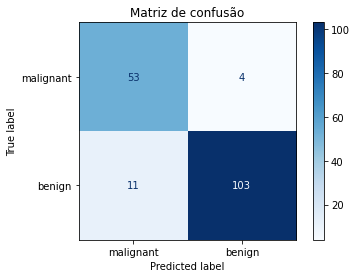

In [398]:
from sklearn.metrics import ConfusionMatrixDisplay
title = 'Matriz de confusão'
disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=list(data.target_names),   #model.classes_,
        cmap=plt.cm.Blues,
        normalize=None,
    )
disp.ax_.set_title(title);

In [ ]:
vp = 53, vn = 103, fp = 11, fn = 4

### Criando uma função para realizar os cálculos:

In [311]:
def calcular_metricas(vp, vn, fp, fn):
    # Calcular acurácia
    acuracia = (vp + vn) / (vp + vn + fp + fn)
    
    # Calcular sensibilidade (recall)
    sensibilidade = vp / (vp + fn)
    
    # Calcular especificidade
    especificidade = vn / (vn + fp)
    
    # Calcular precisão
    precisao = vp / (vp + fp)
    
    # Calcular F-score
    fscore = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)
    
    # Retornar as métricas calculadas
    return acuracia, sensibilidade, especificidade, precisao, fscore

## Realizando o cálculo das métricas:

In [404]:
vp = 53; vn = 103 ; fp = 11; fn = 4

In [405]:
metricas = calcular_metricas(vp, vn, fp, fn)

# Imprimir as métricas
print("Acurácia:", metricas[0])
print("Sensibilidade (Recall):", metricas[1])
print("Especificidade:", metricas[2])
print("Precisão:", metricas[3])
print("F-score:", metricas[4])

Acurácia: 0.9122807017543859
Sensibilidade (Recall): 0.9298245614035088
Especificidade: 0.9035087719298246
Precisão: 0.828125
F-score: 0.8760330578512396


## Conferindo com a biblioteca do sklearn.metrics:

In [408]:
# Calcular as métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)

# Exibir as métricas de avaliação
print(f'Acurácia: {accuracy}')
print(f'Sensibilidade (Recall): {recall}')
print(f'Precisão: {precision}')
print(f'F1-score: {f1}')

Acurácia: 0.9122807017543859
Sensibilidade (Recall): 0.9298245614035088
Precisão: 0.828125
F1-score: 0.8760330578512396


## Conclusão:

* **Acurácia:** A acurácia é uma medida de quão precisa é a classificação do modelo em geral. Ela representa a proporção de casos corretamente classificados em relação ao total de casos. No resultado fornecido (0.9122807017543859), a acurácia é de aproximadamente 91.23%, o que indica que o modelo classificou corretamente cerca de 91.23% dos casos.

* **Sensibilidade (Recall):** A sensibilidade, também conhecida como recall ou taxa de verdadeiros positivos, mede a proporção de casos positivos corretamente identificados pelo modelo em relação ao total de casos positivos. No resultado fornecido (0.9298245614035088), a sensibilidade é de aproximadamente 92.98%, o que indica que o modelo identificou corretamente cerca de 92.98% dos casos positivos(malignos).

* **Especificidade:** A especificidade mede a proporção de casos negativos corretamente identificados pelo modelo em relação ao total de casos negativos. No resultado fornecido (0.9035087719298246), a especificidade é de aproximadamente 90.35%, o que indica que o modelo identificou corretamente cerca de 90.35% dos casos negativos(benignos).

* **Precisão:** A precisão mede a proporção de casos positivos corretamente identificados em relação ao total de casos classificados como positivos pelo modelo. No resultado fornecido (0.828125), a precisão é de aproximadamente 82.81%, o que indica que, dos casos classificados como positivos pelo modelo, cerca de 82.81% foram corretamente identificados.

* **F-score:** O F-score é uma medida que combina a precisão e a sensibilidade do modelo em uma única métrica. Ele fornece uma medida de equilíbrio entre a precisão e a sensibilidade. No resultado fornecido (0.8760330578512396), o F-score é de aproximadamente 87.60%, indicando um bom equilíbrio entre a precisão e a sensibilidade do modelo.

**Essas métricas são usadas para avaliar a performance de modelos de classificação e fornecem informações sobre a qualidade das predições em diferentes aspectos, como a taxa de acertos, a capacidade de identificar corretamente casos positivos e negativos, a precisão na classificação dos casos positivos e o equilíbrio entre precisão e sensibilidade. É importante considerar todas essas métricas em conjunto para obter uma visão abrangente do desempenho do modelo.**